In [1]:
# import libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 1.load data

In [2]:
train = pd.read_csv('../data/train_2016.csv')
properties = pd.read_csv('../data/properties_2016.csv')

print "Binding to float32"
for c, dtype in zip(properties.columns, properties.dtypes):
    if dtype == np.float64:
        properties[c] = properties[c].astype(np.float32)

train_df = train.merge(properties , on='parcelid', how='left')
del properties, train

Binding to float32


## 2.Explore data

### 2.1 Describe train_df

In [3]:
train_df.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.081100e+04,90811.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,...,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.000000,9.027400e+04,90269.000000,1783.000000,8.967000e+04
mean,1.299360e+07,0.010816,1.816372,7.229885,713.581421,2.279474,3.031869,4.0,5.565407,2.309216,...,311.694733,1968.412354,1.440739,1.800911e+05,4.576780e+05,2015.907715,2.783359e+05,5983.966309,13.402692,6.050522e+13
std,2.504000e+06,0.163288,2.974517,2.716197,437.434174,1.004230,1.156281,0.0,1.900903,0.975884,...,346.354889,23.764511,0.544545,2.091276e+05,5.548759e+05,0.907591,4.004918e+05,6838.798828,2.715971,2.051377e+11
min,1.071174e+07,-4.605000,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,...,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.000000,2.200000e+01,49.080002,6.000000,6.037101e+13
25%,1.156440e+07,-0.026300,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,...,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.000000,8.222800e+04,2872.830078,13.000000,6.037320e+13
50%,1.255372e+07,0.005000,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,...,159.000000,1970.000000,1.000000,1.320000e+05,3.428720e+05,2015.000000,1.929700e+05,4542.750000,14.000000,6.037615e+13
75%,1.423720e+07,0.039200,1.000000,7.000000,872.000000,3.000000,4.000000,4.0,7.000000,3.000000,...,361.000000,1987.000000,2.000000,2.105345e+05,5.405890e+05,2015.000000,3.454195e+05,6901.089844,15.000000,6.059042e+13
max,1.629608e+08,4.737000,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,20.000000,...,1366.000000,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.000000,2.450000e+07,321936.093750,99.000000,6.111009e+13


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90811 entries, 0 to 90810
Data columns (total 60 columns):
parcelid                        90811 non-null int64
logerror                        90811 non-null float64
transactiondate                 90811 non-null object
airconditioningtypeid           28781 non-null float32
architecturalstyletypeid        261 non-null float32
basementsqft                    43 non-null float32
bathroomcnt                     90275 non-null float32
bedroomcnt                      90275 non-null float32
buildingclasstypeid             16 non-null float32
buildingqualitytypeid           57364 non-null float32
calculatedbathnbr               89093 non-null float32
decktypeid                      658 non-null float32
finishedfloor1squarefeet        6856 non-null float32
calculatedfinishedsquarefeet    89614 non-null float32
finishedsquarefeet12            85596 non-null float32
finishedsquarefeet13            33 non-null float32
finishedsquarefeet15        

### 2.2 Explore feature

90811


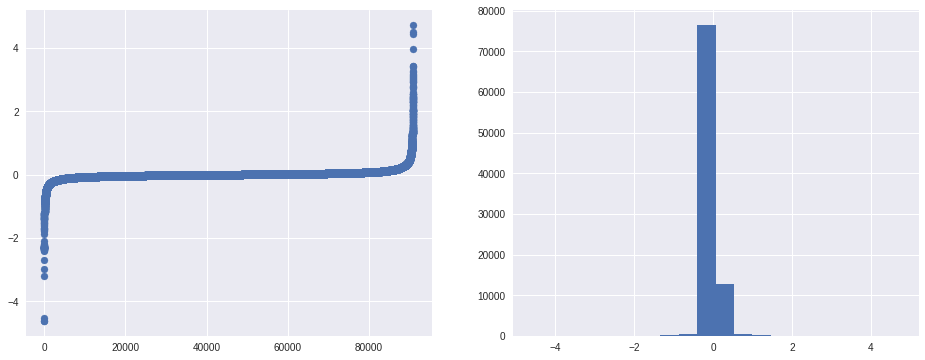

In [5]:
# explore logerror
feature = 'logerror'

feature_data = train_df[feature][train_df[feature].notnull()]
print len(feature_data)

fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(121)
plt.scatter(range(len(feature_data)), np.sort(feature_data))

ax = fig.add_subplot(122)
plt.hist(feature_data, bins=20)

plt.show()

from fig1, some people logerror outlier [-0.4, 0.42]

In [41]:
# geographic location by folium and cluster by k-means
geo_df = train_df[['latitude', 'longitude','logerror']]
geo_df['longitude']/=1e6
geo_df['latitude']/=1e6

#print geo_df[geo_df['logerror']==0]

#from sklearn.cluster import KMeans
#kmeans = KMeans().fit(geo_df[['latitude','longitude']])

85596


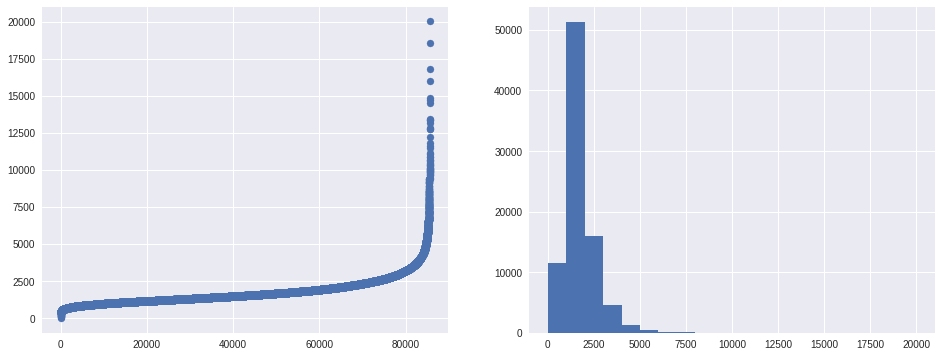

In [44]:
# explore feature finishedsquarefeet12
feature = 'finishedsquarefeet12'

feature_data = train_df[feature][train_df[feature].notnull()]
print len(feature_data)

fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(121)
plt.scatter(range(len(feature_data)), np.sort(feature_data))

ax = fig.add_subplot(122)
plt.hist(feature_data, bins=20)

plt.show()

89614


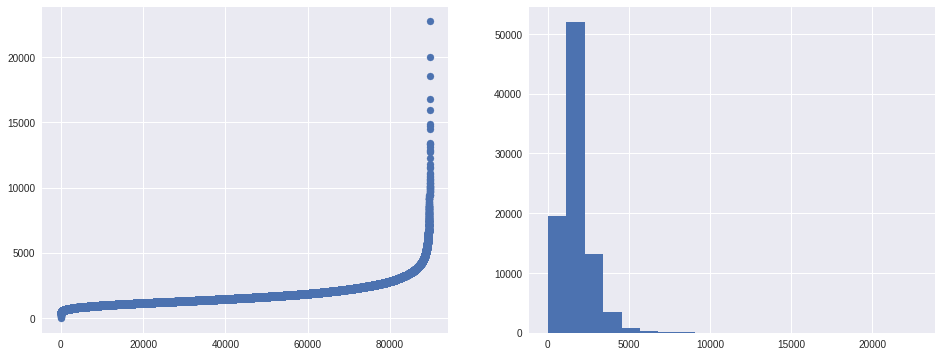

In [46]:
# explore calculatedfinishedsquarefeet
feature = 'calculatedfinishedsquarefeet'

feature_data = train_df[feature][train_df[feature].notnull()]
print len(feature_data)

fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(121)
plt.scatter(range(len(feature_data)), np.sort(feature_data))

ax = fig.add_subplot(122)
plt.hist(feature_data, bins=20)

plt.show()

90811 90811


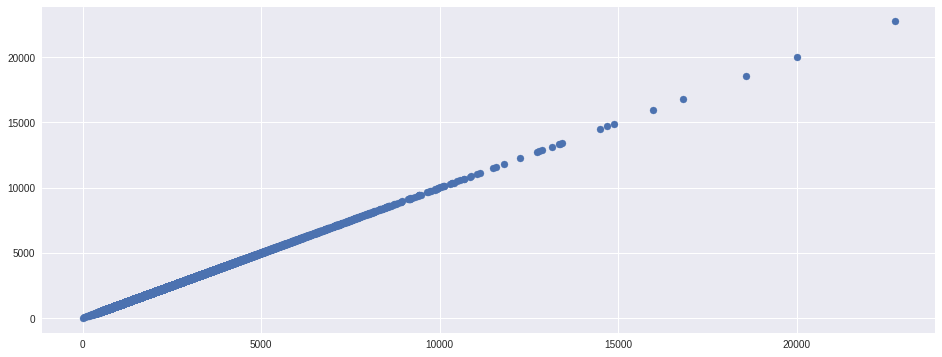

In [62]:
# explore featrue calculatedfinishedsquarefeet and finishedsquarefeet12
feature_c = 'calculatedfinishedsquarefeet'
feature_f = 'finishedsquarefeet12'

train_df[feature_f] = train_df[feature_f].fillna(train_df[feature_c])
train_df[feature_c] = train_df[feature_c].fillna(train_df[feature_f])
#feature_c_data = train_df[feature_c][train_df[feature_c].notnull()]
#feature_f_data = train_df[feature_f][train_df[feature_f].notnull()]

print len(train_df[feature_f].notnull()), len(train_df[feature_c].notnull())

fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(111)
plt.scatter(train_df[feature_c],train_df[feature_f])

#ax = fig.add_subplot(122)
#plt.hist(feature_data, bins=20)

plt.show()